<a href="https://colab.research.google.com/github/7jadhavAbhi7/Tuberculosis_Detection/blob/master/Tuberculosis_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:

!kaggle datasets download tawsifurrahman/tuberculosis-tb-chest-xray-dataset

Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset
License(s): copyright-authors
100% 661M/663M [00:29<00:00, 24.9MB/s]
100% 663M/663M [00:29<00:00, 23.3MB/s]


In [ ]:
!unzip tuberculosis-tb-chest-xray-dataset.zip -d tuberculosis-tb-chest-xray-dataset1

Archive:  tuberculosis-tb-chest-xray-dataset.zip
  inflating: tuberculosis-tb-chest-xray-dataset1/TB_Chest_Radiography_Database/Normal.metadata.xlsx  
  inflating: tuberculosis-tb-chest-xray-dataset1/TB_Chest_Radiography_Database/Normal/Normal-1.png  
  inflating: tuberculosis-tb-chest-xray-dataset1/TB_Chest_Radiography_Database/Normal/Normal-10.png  
  inflating: tuberculosis-tb-chest-xray-dataset1/TB_Chest_Radiography_Database/Normal/Normal-100.png  
  inflating: tuberculosis-tb-chest-xray-dataset1/TB_Chest_Radiography_Database/Normal/Normal-1000.png  
  inflating: tuberculosis-tb-chest-xray-dataset1/TB_Chest_Radiography_Database/Normal/Normal-1001.png  
  inflating: tuberculosis-tb-chest-xray-dataset1/TB_Chest_Radiography_Database/Normal/Normal-1002.png  
  inflating: tuberculosis-tb-chest-xray-dataset1/TB_Chest_Radiography_Database/Normal/Normal-1003.png  
  inflating: tuberculosis-tb-chest-xray-dataset1/TB_Chest_Radiography_Database/Normal/Normal-1004.png  
  inflating: tuberculos

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

dataset_dir1='/content/tuberculosis-tb-chest-xray-dataset1/TB_Chest_Radiography_Database'
image_paths=[]
labels=[]

def process_directory(directory,label_list,path_list):
  for label in os.listdir(directory):
    label_dir=os.path.join(directory,label)
    if os.path.isdir(label_dir):
      for image_name in os.listdir(label_dir):
        if image_name.endswith(('jpg', 'png')):
          image_path=os.path.join(label_dir,image_name)
          path_list.append(image_path)
          label_list.append(label)

# Process the dataset directory
process_directory(dataset_dir1, labels, image_paths)

# Create DataFrame
data = {'Image_Path': image_paths, 'Label': labels}
df = pd.DataFrame(data)
print(df)

                                             Image_Path         Label
0     /content/tuberculosis-tb-chest-xray-dataset1/T...        Normal
1     /content/tuberculosis-tb-chest-xray-dataset1/T...        Normal
2     /content/tuberculosis-tb-chest-xray-dataset1/T...        Normal
3     /content/tuberculosis-tb-chest-xray-dataset1/T...        Normal
4     /content/tuberculosis-tb-chest-xray-dataset1/T...        Normal
...                                                 ...           ...
4195  /content/tuberculosis-tb-chest-xray-dataset1/T...  Tuberculosis
4196  /content/tuberculosis-tb-chest-xray-dataset1/T...  Tuberculosis
4197  /content/tuberculosis-tb-chest-xray-dataset1/T...  Tuberculosis
4198  /content/tuberculosis-tb-chest-xray-dataset1/T...  Tuberculosis
4199  /content/tuberculosis-tb-chest-xray-dataset1/T...  Tuberculosis

[4200 rows x 2 columns]


In [ ]:
train_df,test_df=train_test_split(df,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_df,test_size=0.25,random_state=42)

In [ ]:
print(len(train_df))
print(len(test_df))
print(len(val_df))

2520
840
840


In [ ]:
train_csv_path='/content/tuberculosis-tb-chest-xray-dataset1/train_data.csv'
test_csv_path='/content/tuberculosis-tb-chest-xray-dataset1/test_data.csv'
val_csv_path='/content/tuberculosis-tb-chest-xray-dataset1/val_data.csv'

In [ ]:
train_df.to_csv(train_csv_path,index=False)
test_df.to_csv(test_csv_path,index=False)
val_df.to_csv(val_csv_path,index=False)

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
import os
import shutil

# Define directories
base_dir = '/content/tuberculosis-tb-chest-xray-dataset1/TB_Chest_Radiography_Database'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

for dir in [train_dir, val_dir, test_dir]:
    if not os.path.exists(dir):
        os.makedirs(dir)
classes = df['Label'].unique()
for dir in [train_dir, val_dir, test_dir]:
    for class_name in classes:
        class_dir = os.path.join(dir, class_name)
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)
def move_images(df, set_type):
    for _, row in df.iterrows():
        img_path = row['Image_Path']
        label = row['Label']

        target_dir = os.path.join(base_dir, set_type, label)
        shutil.copy(img_path, target_dir)
move_images(train_df, 'train')
move_images(val_df, 'val')
move_images(test_df, 'test')

print(f"Subdirectories created and images moved.")


Subdirectories created and images moved.


In [ ]:
import os

# Set the base directory containing the folders
base_dir = '/content/tuberculosis-tb-chest-xray-dataset1/TB_Chest_Radiography_Database'

folder_names = ['test', 'train', 'val']
train_image_paths, train_labels = [], []
test_image_paths, test_labels = [], []
val_image_paths, val_labels = [], []

for folder_name in folder_names:
    folder_path = os.path.join(base_dir, folder_name)

    for class_name in ['Normal', 'Tuberculosis']:
        class_path = os.path.join(folder_path, class_name)

        image_paths = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.endswith('.png')]

        labels = [0 if class_name == 'Normal' else 1 for _ in range(len(image_paths))]


        if folder_name == 'test':
            test_image_paths.extend(image_paths)
            test_labels.extend(labels)
        elif folder_name == 'train':
            train_image_paths.extend(image_paths)
            train_labels.extend(labels)
        elif folder_name == 'val':
            val_image_paths.extend(image_paths)
            val_labels.extend(labels)

# Print the split sizes
print(f"Train set size: {len(train_image_paths)} images")
print(f"Test set size: {len(test_image_paths)} images")
print(f"Validation set size: {len(val_image_paths)} images")

Train set size: 2520 images
Test set size: 840 images
Validation set size: 840 images


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the base directory containing the folders
base_dir = '/content/tuberculosis-tb-chest-xray-dataset1/TB_Chest_Radiography_Database'



# Set up data augmentation
train_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_aug = ImageDataGenerator(rescale=1./255)
test_aug = ImageDataGenerator(rescale=1./255)

# Create data generators
batch_size = 32
target_size = (224, 224)

train_generator = train_aug.flow_from_directory(
    directory=os.path.join(base_dir, 'train'),
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_aug.flow_from_directory(
    directory=os.path.join(base_dir, 'val'),
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_aug.flow_from_directory(
    directory=os.path.join(base_dir, 'test'),
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 2520 images belonging to 2 classes.
Found 840 images belonging to 2 classes.
Found 840 images belonging to 2 classes.


In [ ]:
print(train_df.head())
print(test_df.head())
print(val_df.head())

                                             Image_Path         Label
3521  /content/tuberculosis-tb-chest-xray-dataset1/T...  Tuberculosis
2282  /content/tuberculosis-tb-chest-xray-dataset1/T...        Normal
2074  /content/tuberculosis-tb-chest-xray-dataset1/T...        Normal
60    /content/tuberculosis-tb-chest-xray-dataset1/T...        Normal
1847  /content/tuberculosis-tb-chest-xray-dataset1/T...        Normal
                                             Image_Path   Label
1743  /content/tuberculosis-tb-chest-xray-dataset1/T...  Normal
2196  /content/tuberculosis-tb-chest-xray-dataset1/T...  Normal
1728  /content/tuberculosis-tb-chest-xray-dataset1/T...  Normal
3337  /content/tuberculosis-tb-chest-xray-dataset1/T...  Normal
298   /content/tuberculosis-tb-chest-xray-dataset1/T...  Normal
                                             Image_Path         Label
4175  /content/tuberculosis-tb-chest-xray-dataset1/T...  Tuberculosis
1591  /content/tuberculosis-tb-chest-xray-dataset1/T... 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception, DenseNet121, MobileNetV2, ResNet50V2, InceptionV3
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D,Dense,Flatten
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.models import Model

In [ ]:
InceptionV3_model=tf.keras.applications.InceptionV3(weights='imagenet',include_top=False,input_shape=(224,224,3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
for layer in InceptionV3_model.layers:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=2, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 23,115,554 (88.18 MB)

 Trainable params: 1,312,770 (5.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
checkpoint = ModelCheckpoint(filepath=f'{model}_best_model.keras', monitor='val_loss', save_best_only=True)


In [ ]:
optimizer=optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x=train_generator,
            validation_data=val_generator,
            epochs=10,
            callbacks=[early_stopping, reduce_lr, checkpoint]
            )

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 96s 932ms/step - accuracy: 0.8259 - loss: 0.4422 - val_accuracy: 0.9286 - val_loss: 0.1975 - learning_rate: 1.0000e-04
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 114s 705ms/step - accuracy: 0.9233 - loss: 0.1991 - val_accuracy: 0.9381 - val_loss: 0.1769 - learning_rate: 1.0000e-04
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 57s 674ms/step - accuracy: 0.9430 - loss: 0.1552 - val_accuracy: 0.9536 - val_loss: 0.1044 - learning_rate: 1.0000e-04
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 55s 649ms/step - accuracy: 0.9569 - loss: 0.1259 - val_accuracy: 0.9524 - val_loss: 0.1102 - learning_rate: 1.0000e-04
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 85s 695ms/step - accuracy: 0.9606 - loss: 0.1173 - val_accuracy: 0.9690 - val_loss: 0.0901 - learning_rate: 1.0000e-04
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 57s 673ms/step - accuracy: 0.9639 - loss: 0.1113 - val_accuracy: 0.9714 - val_loss: 0.0831 - learning_rate: 1.0000e-04
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 60s 694ms/step - accuracy: 0.9

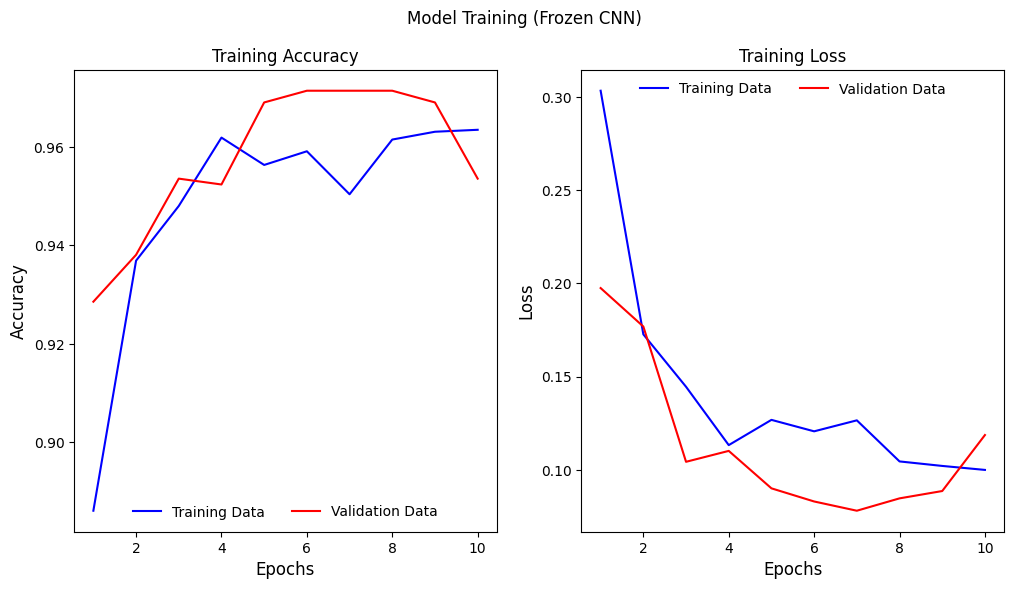

In [ ]:
# Plot performance
import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')

In [ ]:
model.load_weights("/content/<Functional name=functional, built=True>_best_model.keras")
eval_1=model.evaluate(test_generator)
print(eval_1)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 382ms/step - accuracy: 0.9595 - loss: 0.1249
[0.1071036085486412, 0.9654762148857117]


In [ ]:
model.load_weights("/content/<Functional name=functional, built=True>_best_model.keras")
eval_1=model.evaluate(val_generator)
print(eval_1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 387ms/step - accuracy: 0.9666 - loss: 0.0846
[0.07813632488250732, 0.9714285731315613]
